In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第七章/ML_Data1.csv')
data=data.dropna()



In [7]:


features = data.iloc[:, :-1] 
target = data.iloc[:, -1]
from sklearn.preprocessing import PolynomialFeatures


# 创建一个 PolynomialFeatures 对象，设置 degree=2 来生成两两交互的特征
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# 使用 PolynomialFeatures 对象转换你的数据
features_poly = poly.fit_transform(features)

# 将交互特征转换为 DataFrame，并添加列名
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(features.columns))

# 打印结果
print(features_poly_df)

# features_poly_df 包含了原始特征和它们的两两交互项

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_poly_df)
features_train, features_test, target_train, target_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

input_dim = features_train.shape[1]  

        Return  Volatility     Beta1     Beta2      Cor1      Cor2  \
0     0.100000    0.636524  1.344635  1.359665  0.380837  0.388703   
1    -0.043771    0.635464  1.350340  1.364497  0.382936  0.390602   
2    -0.010563    0.628295  1.368196  1.383920  0.393167  0.401384   
3    -0.037367    0.623566  1.368544  1.383909  0.395966  0.404139   
4     0.003697    0.623572  1.368547  1.383838  0.396009  0.404171   
...        ...         ...       ...       ...       ...       ...   
1383  0.005339    0.425182  0.444080  0.441754  0.152891  0.154969   
1384  0.015175    0.425271  0.457091  0.453909  0.157041  0.158926   
1385 -0.005232    0.422707  0.449969  0.446555  0.155777  0.157493   
1386  0.011270    0.422848  0.458732  0.455824  0.158544  0.160416   
1387 -0.002972    0.422059  0.442915  0.440384  0.152184  0.154046   

      NonSysRisk1  NonSysRisk2      Rsq1      Rsq2  ...  \
0        0.059495     0.061978  0.145037  0.151090  ...   
1        0.059967     0.062392  0.146640 

In [8]:

# Separate features and target variable
X = data.drop('Return', axis=1)
y = data['Return']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Design the neural network model with L2 regularization
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(35,), kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = History()
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[history])

Epoch 1/10
35/35 [==============================] - 0s 3ms/step - loss: 11.0697 - val_loss: 7.0078
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 4.7247 - val_loss: 2.8575
Epoch 3/10
35/35 [==============================] - 0s 1ms/step - loss: 1.8832 - val_loss: 1.1045
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.7144 - val_loss: 0.4087
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.2607 - val_loss: 0.1467
Epoch 6/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0927 - val_loss: 0.0518
Epoch 7/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.0183
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0068
Epoch 9/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 10/10
35/35 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0017


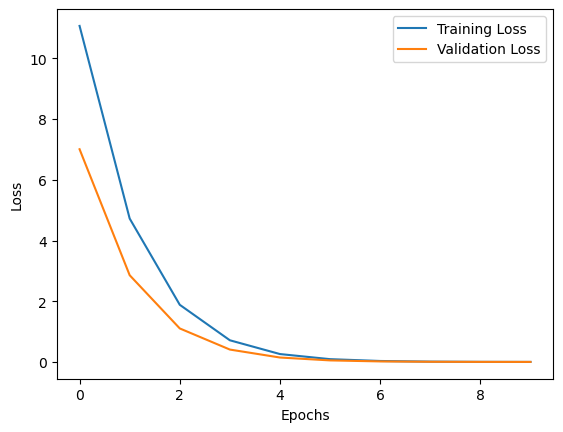

In [9]:
# Visualize the training process and results
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on test data
y_pred = model.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)




9/9 [==============================] - 0s 781us/step
MSE: 0.0011828684361052358
